In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines

In [55]:
gated_acc_entropy = 85.4
gated_acc_margins = 85.6
gated_acc_pmax = 85.6
gated_acc_powentropy = 85.6

cost_entropy = 0.51
cost_margins = 0.505
cost_pmax = 0.503
cost_powentropy = 0.5045

baseline_results_list_dict = [{'label':r' $h$', 'cost': cost_entropy, 'gated_acc':gated_acc_entropy, 'marker': 's', 'color': 'green', 'marker_label': r' $h$'},
                               {'label':r' $p_{margins}$', 'cost': cost_margins, 'gated_acc':gated_acc_margins, 'marker': 's', 'color': 'green', 'marker_label': r' $p_{margins}$'},
                               {'label':r' $p_{max}$', 'cost': cost_pmax, 'gated_acc':gated_acc_pmax, 'marker': 's', 'color': 'green', 'marker_label': r' $p_{max}$'},
                               {'label':r' $h_{pow}$', 'cost': cost_powentropy, 'gated_acc':gated_acc_powentropy, 'marker': 's', 'color': 'green', 'marker_label': r' $h_{pow}$'}]
                            #   {'label':r'init', 'cost': 1, 'gated_acc':90.47, 'marker': '+', 'color': 'yellow', 'marker_label': 'init'}]


In [56]:
surrogate_list_dict = []
# surrogate_list_dict.append({'label':r'$\lambda =0$', 'cost': 0.557, 'gated_acc':84.48, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
# surrogate_list_dict.append({'label':r'$\lambda = 0.001$', 'cost': 0.491, 'gated_acc':83.72, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
# surrogate_list_dict.append({'label':r'$\lambda =0.1$', 'cost': 0.45, 'gated_acc':83.22, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
# surrogate_list_dict.append({'label':r'$\lambda = 0.5$', 'cost': 0.411, 'gated_acc':80.49, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
# surrogate_list_dict.append({'label':r'$\lambda = 1.0$', 'cost': 0.375, 'gated_acc':77.22, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})

# direct_prob_list_dict = []
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 1.0$', 'cost': 0.594, 'gated_acc':87.71, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 0.7$', 'cost': 0.679, 'gated_acc':87.72, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 0.0$', 'cost': 0.947, 'gated_acc':88.58, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 0.1$', 'cost': 0.84, 'gated_acc':89.04, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 0.5$', 'cost': 0.70, 'gated_acc':89.2, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 2$', 'cost': 0.55, 'gated_acc':83.53, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 5$', 'cost': 0.35, 'gated_acc':65.36, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 3$', 'cost': 0.43, 'gated_acc':71.3, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 4$', 'cost': 0.4, 'gated_acc':78, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})


# ignore_subsequent_list_dict = []
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda =4$', 'cost': 0.54, 'gated_acc':84.01, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 3$', 'cost': 0.56, 'gated_acc':84.14, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda =5$', 'cost': 0.52, 'gated_acc':83.15, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda =2$', 'cost': 0.7, 'gated_acc':88.63, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 0.5$', 'cost': 0.83, 'gated_acc':89.399, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 0.1$', 'cost': 0.86, 'gated_acc':89.72, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 0$', 'cost': 0.79, 'gated_acc':89.02, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})

In [57]:
surrogate_list_dict = []
surrogate_list_dict.append({'label':r'$\lambda =0$', 'cost': 0.58, 'gated_acc':84.45, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
surrogate_list_dict.append({'label':r'$\lambda = 0.001$', 'cost': 0.54, 'gated_acc':85.1, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
surrogate_list_dict.append({'label':r'$\lambda =0.1$', 'cost': 0.45, 'gated_acc':84.02, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
surrogate_list_dict.append({'label':r'$\lambda = 0.5$', 'cost': 0.41, 'gated_acc':82.92, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
surrogate_list_dict.append({'label':r'$\lambda = 1$', 'cost': 0.37, 'gated_acc':77.53, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})
surrogate_list_dict.append({'label':r'$\lambda = 2$', 'cost': 0.33, 'gated_acc':72.62, 'marker': '+', 'color':'b', 'marker_label': 'surrogate'})


# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 3$', 'cost': 0.27, 'gated_acc':61.53, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
# direct_prob_list_dict.append({'label':r'direct prob $\lambda = 5$', 'cost': 0.22, 'gated_acc':46.41, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})


# ignore_subsequent_list_dict = []
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda =5$', 'cost': 0.3, 'gated_acc':69.57, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# # ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 4$', 'cost': 0.31, 'gated_acc':71.42, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# # ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda =3$', 'cost': 0.33, 'gated_acc':75.00, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# # ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda =2$', 'cost': 0.35, 'gated_acc':79.41, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 0.5$', 'cost': 0.42, 'gated_acc':85.31, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 0.1$', 'cost': 0.47, 'gated_acc':86.26, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})
# ignore_subsequent_list_dict.append({'label':r'ignore_sub $\lambda = 0$', 'cost': 0.59, 'gated_acc':86.06, 'marker': 'X', 'color':'m', 'marker_label': 'ignore_subsequent'})

# exit_subsequent_list_dict = []
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda =1$', 'cost': 0.42, 'gated_acc':84.81, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda = 4$', 'cost': 0.36, 'gated_acc':78.95, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda =3$', 'cost': 0.37, 'gated_acc':79.54, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda =5$', 'cost': 0.35, 'gated_acc':76.21, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda = 2$', 'cost': 0.40, 'gated_acc':82.99, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda = 0.5$', 'cost': 0.45, 'gated_acc':85.37, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda = 0.1$', 'cost': 0.51, 'gated_acc':86.69, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})
# exit_subsequent_list_dict.append({'label':r'exit sub $\lambda = 0$', 'cost': 0.58, 'gated_acc':85.41, 'marker': 'X', 'color':'c', 'marker_label': 'exit_sub'})

complex_gate_list_dict = []
complex_gate_list_dict.append({'label':r'complex $\lambda = 0.0$', 'cost': 0.638, 'gated_acc':88.63, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
complex_gate_list_dict.append({'label':r'complex $\lambda = 0.05$', 'cost': 0.536, 'gated_acc':88.28, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
complex_gate_list_dict.append({'label':r'complex $\lambda = 0.1$', 'cost': 0.53, 'gated_acc':88.2, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
complex_gate_list_dict.append({'label':r'complex $\lambda = 0.5$', 'cost': 0.48, 'gated_acc':86.55, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
complex_gate_list_dict.append({'label':r'complex $\lambda = 1$', 'cost': 0.44, 'gated_acc':85.08, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})
complex_gate_list_dict.append({'label':r'complex $\lambda = 2$', 'cost': 0.429, 'gated_acc':83.77, 'marker': '^', 'color':'r', 'marker_label': 'direct_prob'})

FileNotFoundError: [Errno 2] No such file or directory: 'ic_vs_accuracy_push_sub.pdf'

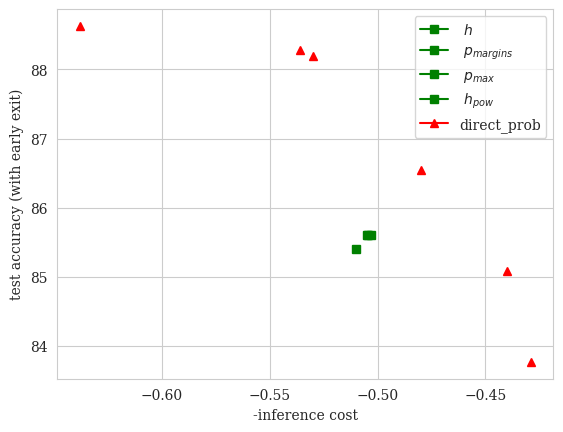

In [58]:
font = {'family' : 'serif',
        'size'   : 10}

combined_dicts = baseline_results_list_dict + complex_gate_list_dict
matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_acc = dict_of_result['gated_acc']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(-cost, gated_acc, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('-inference cost')
ax.set_ylabel('test accuracy (with early exit)')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)
plt.savefig('ic_vs_accuracy_push_sub.pdf')

In [ ]:
plt.close()